In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications import ResNet50

In [2]:
!cp -r '/content/drive/MyDrive/Final Dataset' '/content/Final_Dataset'

In [ ]:
# Data Augmentation
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=20,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,       # Shift images horizontally by 10%
    height_shift_range=0.1,      # Shift images vertically by 10%
    shear_range=10,              # Apply shear transformation
    zoom_range=0.2,              # Randomly zoom in/out by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    vertical_flip=True,          # Randomly flip images vertically
    fill_mode='nearest'          # Fill in empty pixels after transformation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
        '/content/Final_Dataset/Train',
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='binary')

validation_ds = test_datagen.flow_from_directory(
        '/content/Final_Dataset/Val',
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='binary')

## Custom CNN

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='valid', activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))

model.add(Conv2D(128,(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))

model.add(Conv2D(256,(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,560,705 (5.95 MB)

 Trainable params: 1,559,809 (5.95 MB)

 Non-trainable params: 896 (3.50 KB)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [43]:
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0001)

In [44]:
model.compile(optimizer=Optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(train_ds, epochs=100, validation_data=validation_ds, callbacks=early_stop)

Epoch 1/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.6891 - loss: 0.5988 - val_accuracy: 0.7329 - val_loss: 0.5100
Epoch 2/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.7219 - loss: 0.5256 - val_accuracy: 0.7530 - val_loss: 0.4844
Epoch 3/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7440 - loss: 0.4940 - val_accuracy: 0.7444 - val_loss: 0.4983
Epoch 4/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7552 - loss: 0.4810 - val_accuracy: 0.7439 - val_loss: 0.4988
Epoch 5/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7626 - loss: 0.4736 - val_accuracy: 0.7789 - val_loss: 0.4506
Epoch 6/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7674 - loss: 0.4625 - val_accuracy: 0.7621 - val_loss: 0.4705
Epoch 7/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7807 - loss: 0.4410 - val_accuracy: 0.7734 - val_loss: 0.4640
Epoch 8/100
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 

In [46]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(validation_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7817 - loss: 0.4495
Test accuracy: 0.7789
Test loss: 0.4506


In [47]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Train accuracy: {train_accuracy:.4f}") ;
print(f"Train loss: {train_loss:.4f}")

1031/1031 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7824 - loss: 0.4359
Train accuracy: 0.7810
Train loss: 0.4366


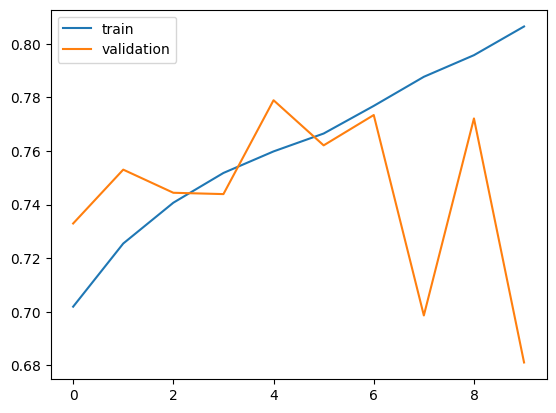

In [48]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

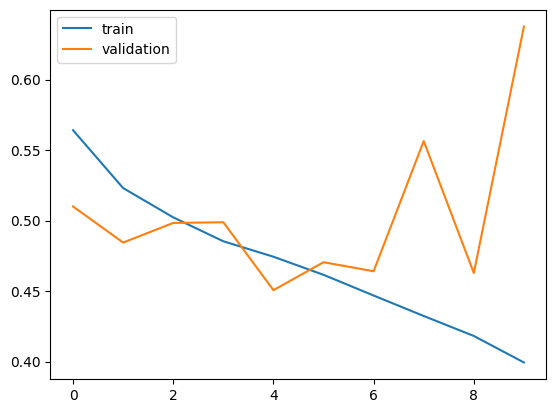

In [49]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

## ResNet50 - Feature Extraction

In [50]:
conv_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(64,64,3)
)

In [51]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [52]:
conv_base.trainable = False

In [53]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,644,737 (94.01 MB)

 Trainable params: 1,057,025 (4.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [55]:
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0001)

In [56]:
model.compile(optimizer=Optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(train_ds, epochs=80, validation_data=validation_ds, callbacks=early_stop)

Epoch 1/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.5791 - loss: 0.6777 - val_accuracy: 0.6770 - val_loss: 0.6158
Epoch 2/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6571 - loss: 0.6287 - val_accuracy: 0.7107 - val_loss: 0.5896
Epoch 3/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6776 - loss: 0.6048 - val_accuracy: 0.7117 - val_loss: 0.5719
Epoch 4/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6870 - loss: 0.5942 - val_accuracy: 0.7091 - val_loss: 0.5675
Epoch 5/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6887 - loss: 0.5923 - val_accuracy: 0.7000 - val_loss: 0.5870
Epoch 6/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6853 - loss: 0.5899 - val_accuracy: 0.7056 - val_loss: 0.5677
Epoch 7/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.6948 - loss: 0.5843 - val_accuracy: 0.7170 - val_loss: 0.5597
Epoch 8/80
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6914 -

In [58]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(validation_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7252 - loss: 0.5347
Test accuracy: 0.7279
Test loss: 0.5340


In [59]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Train accuracy: {train_accuracy:.4f}") ;
print(f"Train loss: {train_loss:.4f}")

1031/1031 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7091 - loss: 0.5504
Train accuracy: 0.7120
Train loss: 0.5498


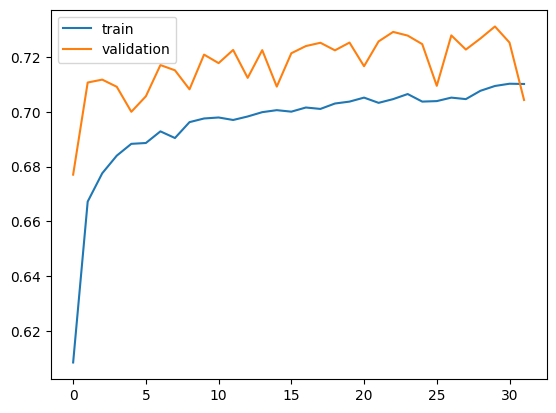

In [60]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

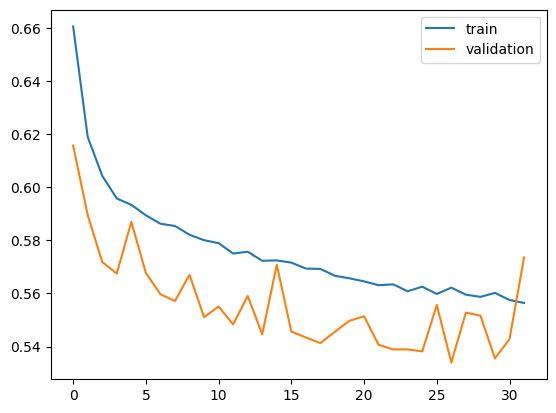

In [61]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

## ResNet - Fine Tuning

In [62]:
conv_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(64,64,3)
)

In [63]:
conv_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 70, 70, 3) │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 16, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 16, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 16, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 16, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 16, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 16, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [64]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'conv5_block3_1_conv':  # Start fine-tuning from this layer
        set_trainable = True
    layer.trainable = set_trainable

In [65]:
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_12 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block

In [66]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,644,737 (94.01 MB)

 Trainable params: 5,522,689 (21.07 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [71]:
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0001)

In [72]:
model.compile(optimizer=Optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(train_ds, epochs=50, validation_data=validation_ds, callbacks=early_stop)

Epoch 1/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.6765 - loss: 0.6037 - val_accuracy: 0.7231 - val_loss: 0.5638
Epoch 2/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.7056 - loss: 0.5634 - val_accuracy: 0.6221 - val_loss: 0.9469
Epoch 3/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7086 - loss: 0.5525 - val_accuracy: 0.6848 - val_loss: 0.6886
Epoch 4/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.7197 - loss: 0.5400 - val_accuracy: 0.7360 - val_loss: 0.5242
Epoch 5/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.7190 - loss: 0.5409 - val_accuracy: 0.6407 - val_loss: 1.4246
Epoch 6/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.7224 - loss: 0.5346 - val_accuracy: 0.7174 - val_loss: 0.5545
Epoch 7/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.7237 - loss: 0.5370 - val_accuracy: 0.6597 - val_loss: 0.7205
Epoch 8/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.7249 -

In [74]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(validation_ds)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7331 - loss: 0.5235
Test accuracy: 0.7360
Test loss: 0.5242


In [75]:
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Train accuracy: {train_accuracy:.4f}") ;
print(f"Train loss: {train_loss:.4f}")

1031/1031 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7198 - loss: 0.5374
Train accuracy: 0.7166
Train loss: 0.5379


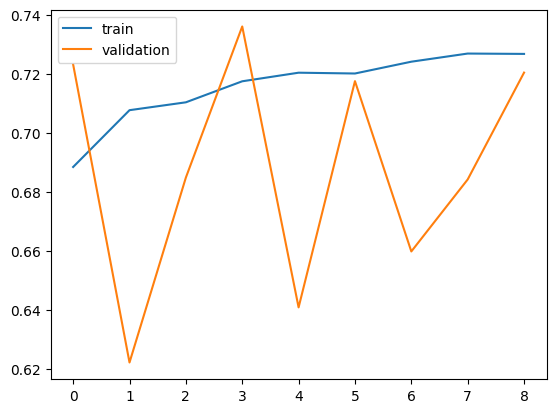

In [76]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

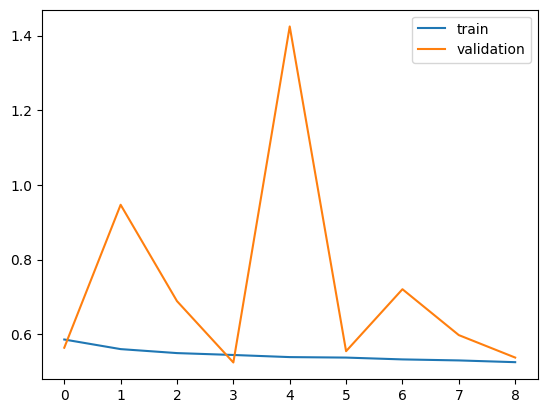

In [77]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()